# Librerias a utilizar

In [2]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Importar Dataset 

In [15]:
df_all_mesos = pd.read_csv("../DATASETS/new_df_mesos.csv", index_col="month_year", parse_dates=True)
df_all_mesos = df_all_mesos.dropna(subset=['Agressions'])
df_all_mesos

,Agressions,New Years,agressions_2_month_avg,agressions_6_month_avg,agressions_lag_1,agressions_lag_2,agressions_lag_3,agressions_lag_4,month,primavera,...,"sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","cos(3,freq=W-SUN)","sin(4,freq=W-SUN)",Poverty,HS Grads,BA Grads,Housing
month_year,,,,,,,,,,,,,,,,,,,,,
2001-01-01,318.0,1,0.0,0.000000,0.0,0.0,0.0,0.0,1,0,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.196,0.71817,0.254851,0.437756
2001-02-01,223.0,0,270.5,0.000000,318.0,0.0,0.0,0.0,2,0,...,0.433884,-0.900969,-0.781831,0.623490,-0.222521,-0.974928,0.196,0.71817,0.254851,0.437756
2001-03-01,264.0,0,243.5,0.000000,223.0,318.0,0.0,0.0,3,1,...,0.433884,-0.900969,-0.781831,0.623490,-0.222521,-0.974928,0.196,0.71817,0.254851,0.437756
2001-04-01,222.0,0,243.0,0.000000,264.0,223.0,318.0,0.0,4,1,...,-0.781831,0.623490,-0.974928,-0.222521,-0.900969,0.433884,0.196,0.71817,0.254851,0.437756
2001-05-01,282.0,0,252.0,0.000000,222.0,264.0,223.0,318.0,5,1,...,0.781831,0.623490,0.974928,-0.222521,-0.900969,-0.433884,0.196,0.71817,0.254851,0.437756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,193.0,0,195.5,204.333333,198.0,211.0,212.0,226.0,11,0,...,0.974928,-0.222521,-0.433884,-0.900969,0.623490,0.781831,0.173,0.85900,0.411000,0.453000
2017-12-01,184.0,0,188.5,204.000000,193.0,198.0,211.0,212.0,12,0,...,-0.433884,-0.900969,0.781831,0.623490,-0.222521,0.974928,0.173,0.85900,0.411000,0.453000
2018-01-01,155.0,1,169.5,192.166667,184.0,193.0,198.0,211.0,1,0,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.173,0.85900,0.411000,0.453000


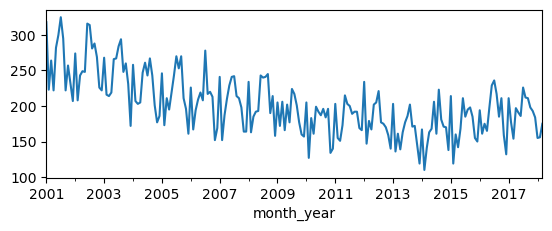

In [16]:
df_all_mesos["Agressions"].plot(subplots=True, layout=(2,1));

# Dividir en train y test

In [42]:
train_data, test_data = df_all_mesos[:'2015-12'], df_all_mesos.loc['2016-01':'2016-12']
train_arima = train_data['Agressions']
test_arima = test_data['Agressions']

# Entrenar modelo

In [43]:
history = [x for x in train_arima]
y = test_arima
y = y[y.notna()]
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -878.781
Date:                Thu, 18 Jan 2024   AIC                           1761.563
Time:                        21:21:27   BIC                           1767.938
Sample:                             0   HQIC                          1764.148
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5103      0.072     -7.107      0.000      -0.651      -0.370
sigma2      1074.2836    123.176      8.722      0.000     832.863    1315.704
Ljung-Box (L1) (Q):                   0.34   Jarque-

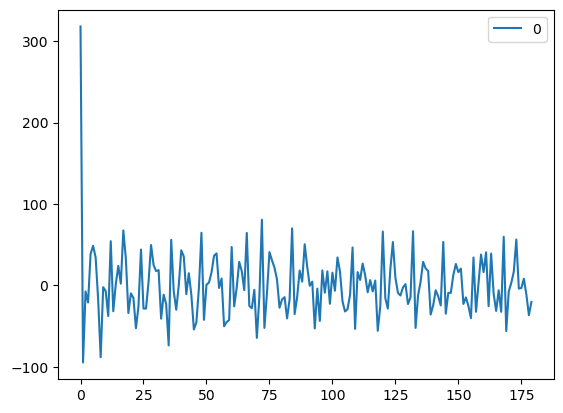

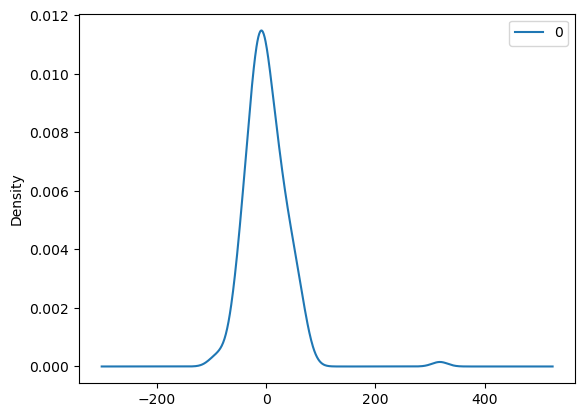

                0
count  180.000000
mean     0.372497
std     40.644052
min    -94.764598
25%    -24.779330
50%     -4.768909
75%     18.996526
max    318.000000


In [44]:
print(model_fit.summary()) #resumen del entrenamiento del modelo
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde') 
pyplot.show()
print(residuals.describe()) # resumen de stats de residuales 

In [45]:
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_1592/151777919.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [46]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_1592/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [47]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 989.2811739874668
MAE: 26.297326342864903
RMSE: 31.4528404756624


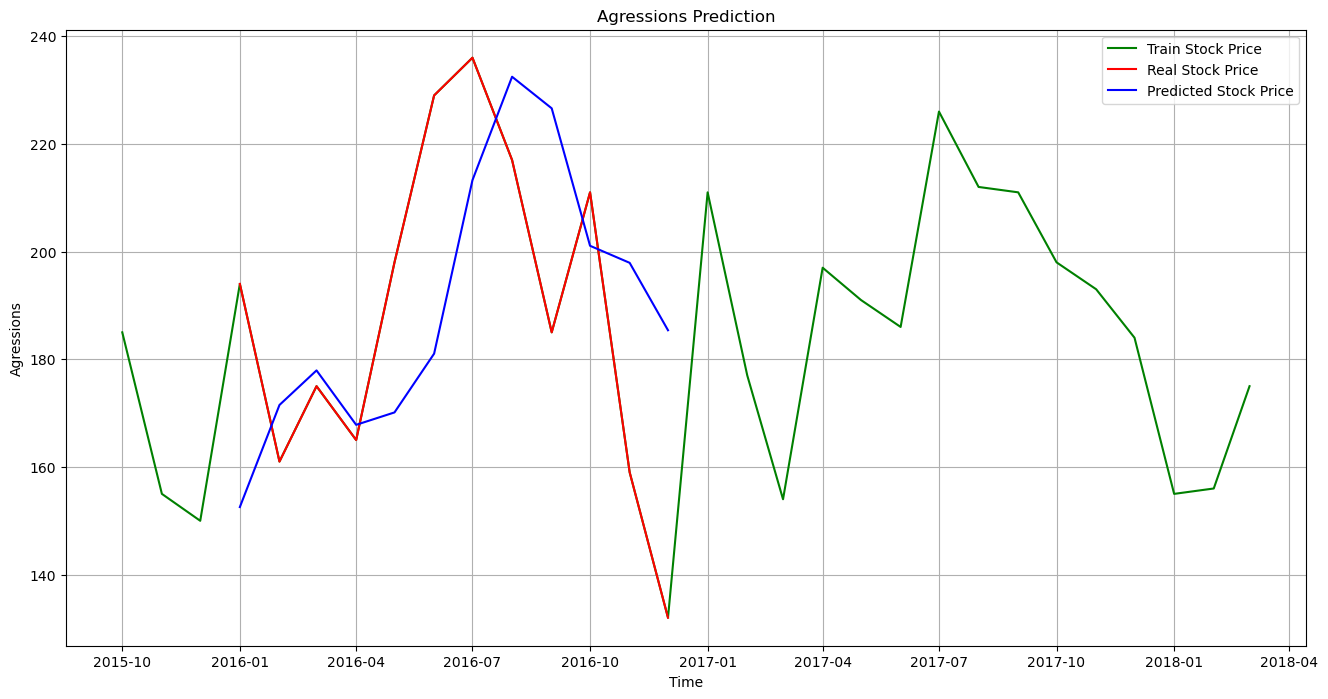

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df_all_mesos.index[-30:], df_all_mesos['Agressions'].tail(30), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Agressions Prediction')
plt.xlabel('Time')
plt.ylabel('Agressions')
plt.legend()
plt.grid(True)
plt.savefig('arima_model_anual_2016.pdf')
plt.show()

In [64]:
df_pred_ano = pd.concat([y, pd.Series(predictions, index=y.index[-len(predictions):], name='Predictions')], axis=1)
df_pred_ano

,Agressions,Predictions
month_year,,
2016-01-01,194.0,152.551713
2016-02-01,161.0,171.509054
2016-03-01,175.0,177.928935
2016-04-01,165.0,167.823137
2016-05-01,198.0,170.128034
2016-06-01,229.0,181.041230
2016-07-01,236.0,213.261504
2016-08-01,217.0,232.465328
2016-09-01,185.0,226.602333


In [61]:
pred_models = pd.read_csv("../DATASETS/pred_models_ano_2016.csv", index_col="month_year", parse_dates=True)
pred_models

,Agressions,XGBoost
month_year,,
2016-01-01,194.0,205.53833
2016-02-01,161.0,140.03206
2016-03-01,175.0,167.00824
2016-04-01,165.0,167.54010
2016-05-01,198.0,185.68767
2016-06-01,229.0,205.83235
2016-07-01,236.0,213.64566
2016-08-01,217.0,193.92600
2016-09-01,185.0,206.68384


In [74]:
pred_models_2016 = pred_models.merge(df_pred_ano[['Predictions']], left_index=True, right_index=True, how='left')
pred_models_2016 = pred_models_2016.rename(columns={'Predictions':'ARIMA'})

In [75]:
pred_models_2016

,Agressions,XGBoost,ARIMA
month_year,,,
2016-01-01,194.0,205.53833,152.551713
2016-02-01,161.0,140.03206,171.509054
2016-03-01,175.0,167.00824,177.928935
2016-04-01,165.0,167.54010,167.823137
2016-05-01,198.0,185.68767,170.128034
2016-06-01,229.0,205.83235,181.041230
2016-07-01,236.0,213.64566,213.261504
2016-08-01,217.0,193.92600,232.465328
2016-09-01,185.0,206.68384,226.602333


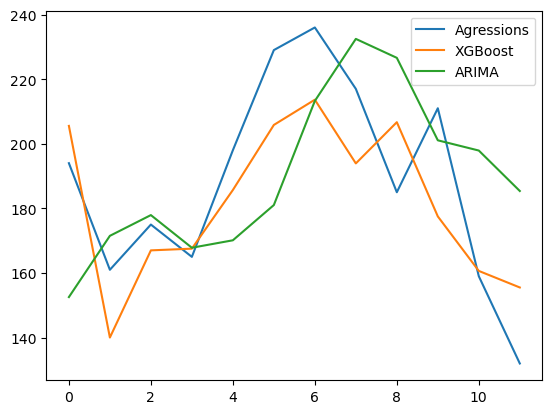

In [76]:
pred_models_2016 = pred_models_2016.reset_index()
pred_models_2016.plot(y=["Agressions","XGBoost","ARIMA"])
plt.show()